In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [132]:
students = pd.read_csv('stud_math.csv')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [133]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [134]:
# Introduce a function for analysis of categorical data

def categorical(column_name):
    # Existing values and their counts
    values_series = students[column_name].value_counts()
    
    # Number of missing values and their percentage in the dataframe
    nan_count = len(students) - values_series.sum()
    print('NaNs in the column: {}; {:.0f}% from total'.format(nan_count, (nan_count / len(students)) * 100))
    
    # Find the most frequent value
    print('The most frequent value is {}; {:.0f}% of total non-null'.format(values_series.index[0],
                                                                            (values_series.values[0] / values_series.sum()) * 100))
    print(values_series)

In [135]:
# Introduce a function for analysis of numeric data

def numeric(column_name, bins=5):
    headers = ['STATISTICS', 'OUTLIERS', 'NANs', 'HISTOGRAM']
    
    # Parameter summary
    print(f'{headers[0]:=^20}')
    summary = students[column_name].describe()
    print(summary)
    
    # Interquartile range
    q1 = summary['25%']
    q3 = summary['75%']
    iqr = q3 - q1
    print('Interquartile range is {}; non-outlier are from {} to {}'.format(iqr, q1 - iqr*1.5, q3 + iqr*1.5))
    
    # Find outliers according to the formula q3,1 +- 1.5 * IQR
    print(f'\n{headers[1]:=^20}')
    outliers = students[(students[column_name] > q3 + iqr*1.5) | (students[column_name] < q1 - iqr*1.5)]
    print('{} outlier(s):'.format(len(outliers)))
    print(outliers)
    
    # Number of missing values and their percentage in the dataframe
    print(f'\n{headers[2]:=^20}')
    print('NaNs in the column: {}; {:.0f}% from total'.format(len(students) - summary['count'],
                                                              ((len(students) - summary['count']) / len(students)) * 100))
    
    # Find the most frequent value
    moda = students[column_name].mode().values[0]
    print('The most frequent value is {}; {:.0f}% of total non-null'.format(moda,
                                                                            (len(students[students[column_name]==moda]) / summary['count']) * 100))
    
    # Histogram
    print(f'\n{headers[3]:=^20}')
    students[column_name].hist(bins=bins)

### school

In [136]:
students['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

### sex

In [137]:
students['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

### age

=====STATISTICS=====
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Interquartile range is 2.0; non-outlier are from 13.0 to 21.0

======OUTLIERS======
1 outlier(s):
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
247     GP   M   22       U     GT3       T   3.0   1.0  services  services   

     ... studytime, granular higher  internet  romantic  famrel freetime  \
247  ...                -3.0     no       yes       yes     5.0      4.0   

    goout health absences score  
247   5.0    1.0     16.0  40.0  

[1 rows x 30 columns]

========NANs========
NaNs in the column: 0.0; 0% from total
The most frequent value is 16; 26% of total non-null

=====HISTOGRAM======


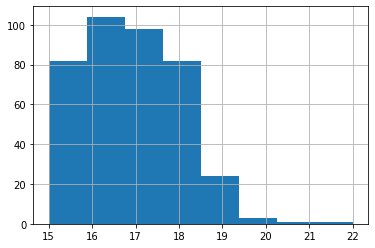

In [138]:
numeric('age', bins=8)

Formally, age 22 is outlier becuase 22 > q3 + 1.5 * IQR, but it's only 1 year more from the previous value and doesn't look like an impossible value, so we'd better leave it in the dataset.

### address

In [139]:
categorical('address')

NaNs in the column: 17; 4% from total
The most frequent value is U; 78% of total non-null
U    295
R     83
Name: address, dtype: int64


Replace 4% of NaN values with the most frequent value ('U').

In [140]:
students['address'].fillna('U', inplace=True)
categorical('address')

NaNs in the column: 0; 0% from total
The most frequent value is U; 79% of total non-null
U    312
R     83
Name: address, dtype: int64


### famsize

In [141]:
categorical('famsize')

NaNs in the column: 27; 7% from total
The most frequent value is GT3; 71% of total non-null
GT3    261
LE3    107
Name: famsize, dtype: int64


Replace 7% of NaN values with the most frequent value ('GT3').

In [142]:
students['famsize'].fillna('GT3', inplace=True)
categorical('famsize')

NaNs in the column: 0; 0% from total
The most frequent value is GT3; 73% of total non-null
GT3    288
LE3    107
Name: famsize, dtype: int64


### Pstatus

In [143]:
categorical('Pstatus')

NaNs in the column: 45; 11% from total
The most frequent value is T; 90% of total non-null
T    314
A     36
Name: Pstatus, dtype: int64


Replace 11% of NaN values with the most frequent value ('T').

In [144]:
students['Pstatus'].fillna('T', inplace=True)
categorical('Pstatus')

NaNs in the column: 0; 0% from total
The most frequent value is T; 91% of total non-null
T    359
A     36
Name: Pstatus, dtype: int64


### Medu

Despite the fact that Medu is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (0, 1, 2, 3, 4). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [145]:
students['Medu'] = students['Medu'].astype('category')
categorical('Medu')

NaNs in the column: 3; 1% from total
The most frequent value is 4.0; 33% of total non-null
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


Replace 3 NaN values with the most frequent value (4).

In [146]:
students['Medu'].fillna(4, inplace=True)
categorical('Medu')

NaNs in the column: 0; 0% from total
The most frequent value is 4.0; 34% of total non-null
4.0    134
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


### Fedu

Despite the fact that Fedu is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (0, 1, 2, 3, 4). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [147]:
students['Fedu'] = students['Fedu'].astype('category')
categorical('Fedu')

NaNs in the column: 24; 6% from total
The most frequent value is 2.0; 29% of total non-null
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


We have an outlier 40 which is mostly likely a typo, so we replace it with 4.

Replace 6% of NaN values with the most frequent value (2).

In [148]:
students['Fedu'].replace(40, 4, inplace=True)
students['Fedu'].fillna(2, inplace=True)
categorical('Fedu')

NaNs in the column: 0; 0% from total
The most frequent value is 2.0; 33% of total non-null
2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64


### Mjob

In [149]:
categorical('Mjob')

NaNs in the column: 19; 5% from total
The most frequent value is other; 35% of total non-null
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


Replace 5% of NaN values with 'other'.

In [150]:
students['Mjob'].fillna('other', inplace=True)
categorical('Mjob')

NaNs in the column: 0; 0% from total
The most frequent value is other; 38% of total non-null
other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


### Fjob

In [151]:
categorical('Fjob')

NaNs in the column: 36; 9% from total
The most frequent value is other; 55% of total non-null
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


Replace 9% of NaN values with 'other'.

In [152]:
students['Fjob'].fillna('other', inplace=True)
categorical('Fjob')

NaNs in the column: 0; 0% from total
The most frequent value is other; 59% of total non-null
other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


### reason

In [153]:
categorical('reason')

NaNs in the column: 17; 4% from total
The most frequent value is course; 36% of total non-null
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


Non-missing values are almost equally distributed, which is inconclusive. Let's assign the missing values to the 'other' category.

In [154]:
students['reason'].fillna('other', inplace=True)
categorical('reason')

NaNs in the column: 0; 0% from total
The most frequent value is course; 35% of total non-null
course        137
home          104
reputation    103
other          51
Name: reason, dtype: int64


### guardian

In [155]:
categorical('guardian')

NaNs in the column: 31; 8% from total
The most frequent value is mother; 69% of total non-null
mother    250
father     86
other      28
Name: guardian, dtype: int64


We can replace 8% of missing values either with the most frequent value ('mother') or with the 'other' category. Let's assign them to 'other'.

In [156]:
students['guardian'].fillna('other', inplace=True)
categorical('guardian')

NaNs in the column: 0; 0% from total
The most frequent value is mother; 63% of total non-null
mother    250
father     86
other      59
Name: guardian, dtype: int64


### traveltime

Despite the fact that traveltime is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (1, 2, 3, 4). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [157]:
students['traveltime'] = students['traveltime'].astype('category')
categorical('traveltime')

NaNs in the column: 28; 7% from total
The most frequent value is 1.0; 66% of total non-null
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


Replace 7% of missing values with the most frequent value (1).

In [158]:
students['traveltime'].fillna(1, inplace=True)
categorical('traveltime')

NaNs in the column: 0; 0% from total
The most frequent value is 1.0; 68% of total non-null
1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


### studytime

Despite the fact that studytime is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (1, 2, 3, 4). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [159]:
students['studytime'] = students['studytime'].astype('category')
categorical('studytime')

NaNs in the column: 7; 2% from total
The most frequent value is 2.0; 50% of total non-null
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


Replace 7 missing values with the most frequent value (2).

In [160]:
students['studytime'].fillna(2, inplace=True)
categorical('studytime')

NaNs in the column: 0; 0% from total
The most frequent value is 2.0; 51% of total non-null
2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


### failures

=====STATISTICS=====
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Interquartile range is 0.0; non-outlier are from 0.0 to 0.0

======OUTLIERS======
80 outlier(s):
    school sex  age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
2       GP   F   15       U     LE3       T  1.0  1.0   at_home     other   
18      GP   M   17       U     GT3       T  3.0  2.0  services  services   
25      GP   F   16       U     GT3       T  2.0  2.0  services  services   
40      GP   F   16       U     LE3       T  2.0  2.0     other     other   
44      GP   F   16       U     LE3       T  2.0  2.0     other     other   
..     ...  ..  ...     ...     ...     ...  ...  ...       ...       ...   
384     MS   M   18       R     GT3       T  4.0  2.0     other     other   
387     MS   F   19       R     GT3       T  2.0  3.0  services     other  

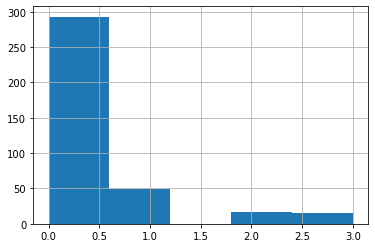

In [161]:
numeric('failures')

Because most of the studes have no failures any value > 0 is considered as an outlier according to the formula, however  we should not get rid of them as for us it could be a valuable indicator.

Let's replace 6% of missing values with the most frequent value (0).

=====STATISTICS=====
count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Interquartile range is 0.0; non-outlier are from 0.0 to 0.0

======OUTLIERS======
80 outlier(s):
    school sex  age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
2       GP   F   15       U     LE3       T  1.0  1.0   at_home     other   
18      GP   M   17       U     GT3       T  3.0  2.0  services  services   
25      GP   F   16       U     GT3       T  2.0  2.0  services  services   
40      GP   F   16       U     LE3       T  2.0  2.0     other     other   
44      GP   F   16       U     LE3       T  2.0  2.0     other     other   
..     ...  ..  ...     ...     ...     ...  ...  ...       ...       ...   
384     MS   M   18       R     GT3       T  4.0  2.0     other     other   
387     MS   F   19       R     GT3       T  2.0  3.0  services     other  

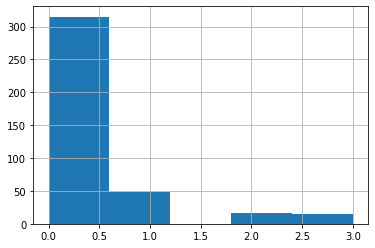

In [162]:
students['failures'].fillna(0, inplace=True)
numeric('failures')

### schoolsup

In [163]:
categorical('schoolsup')

NaNs in the column: 9; 2% from total
The most frequent value is no; 87% of total non-null
no     335
yes     51
Name: schoolsup, dtype: int64


Replace 2% of missing values with the most frequent value ('no').

In [164]:
students['schoolsup'].fillna('no', inplace=True)
categorical('schoolsup')

NaNs in the column: 0; 0% from total
The most frequent value is no; 87% of total non-null
no     344
yes     51
Name: schoolsup, dtype: int64


### famsup

In [165]:
categorical('famsup')

NaNs in the column: 39; 10% from total
The most frequent value is yes; 62% of total non-null
yes    219
no     137
Name: famsup, dtype: int64


The distribution of non-missing values (62% / 38%) is not conclusive enough to fill 10% of missing values with the most frequent value. Instead of that let's replace the missing values with a new category 'other'.

In [166]:
students['famsup'].fillna('other', inplace=True)
categorical('famsup')

NaNs in the column: 0; 0% from total
The most frequent value is yes; 55% of total non-null
yes      219
no       137
other     39
Name: famsup, dtype: int64


### paid

In [167]:
categorical('paid')

NaNs in the column: 40; 10% from total
The most frequent value is no; 56% of total non-null
no     200
yes    155
Name: paid, dtype: int64


The distribution of non-missing values (56% / 44%) is not conclusive enough to fill 10% of missing values with the most frequent value. Instead of that let's replace the missing values with a new category 'other'.

In [168]:
students['paid'].fillna('other', inplace=True)
categorical('paid')

NaNs in the column: 0; 0% from total
The most frequent value is no; 51% of total non-null
no       200
yes      155
other     40
Name: paid, dtype: int64


### activities

In [169]:
categorical('activities')

NaNs in the column: 14; 4% from total
The most frequent value is yes; 51% of total non-null
yes    195
no     186
Name: activities, dtype: int64


The distribution of non-missing values (51% / 49%) is not conclusive enough to fill 4% of missing values with the most frequent value. Instead of that let's replace the missing values with a new category 'other'.

In [170]:
students['activities'].fillna('other', inplace=True)
categorical('activities')

NaNs in the column: 0; 0% from total
The most frequent value is yes; 49% of total non-null
yes      195
no       186
other     14
Name: activities, dtype: int64


### nursery

In [171]:
categorical('nursery')

NaNs in the column: 16; 4% from total
The most frequent value is yes; 79% of total non-null
yes    300
no      79
Name: nursery, dtype: int64


Replace 4% of missing data with the most frequent value ('yes').

In [172]:
students['nursery'].fillna('yes', inplace=True)
categorical('nursery')

NaNs in the column: 0; 0% from total
The most frequent value is yes; 80% of total non-null
yes    316
no      79
Name: nursery, dtype: int64


### studytime, granular

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

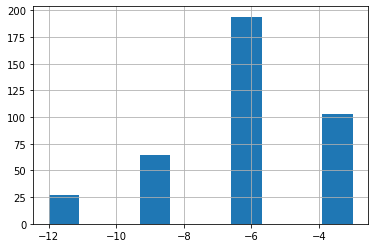

In [173]:
students['studytime, granular'].hist()
students['studytime, granular'].describe()

In [174]:
# Everywhere where 'studytime, granular' isn't NaN, it's equal to 'studytime' * -3

(students[~students['studytime, granular'].isna()]['studytime'].astype('int64') * -3 \
 == students[~students['studytime, granular'].isna()]['studytime, granular']).sum() \
== len(students[~students['studytime, granular'].isna()])

True

Studytime, granular is the same column as studytime, but multiplied by -3. It provides no additional information so let's drop it from the dataframe.

In [175]:
students.drop('studytime, granular', axis=1, inplace=True)

### higher

In [176]:
categorical('higher')

NaNs in the column: 20; 5% from total
The most frequent value is yes; 95% of total non-null
yes    356
no      19
Name: higher, dtype: int64


Replace 5% of missing data with the most frequent value ('yes').

In [177]:
students['higher'].fillna('yes', inplace=True)
categorical('higher')

NaNs in the column: 0; 0% from total
The most frequent value is yes; 95% of total non-null
yes    376
no      19
Name: higher, dtype: int64


### internet

In [178]:
categorical('internet')

NaNs in the column: 34; 9% from total
The most frequent value is yes; 84% of total non-null
yes    305
no      56
Name: internet, dtype: int64


Replace 9% of missing data with the most frequent value ('yes').

In [179]:
students['internet'].fillna('yes', inplace=True)
categorical('internet')

NaNs in the column: 0; 0% from total
The most frequent value is yes; 86% of total non-null
yes    339
no      56
Name: internet, dtype: int64


### romantic

In [180]:
categorical('romantic')

NaNs in the column: 31; 8% from total
The most frequent value is no; 66% of total non-null
no     240
yes    124
Name: romantic, dtype: int64


The distribution of non-missing values (66% / 34%) is not conclusive enough to fill 8% of missing values with the most frequent value. Instead of that let's replace the missing values with a new category 'other'.

In [181]:
students['romantic'].fillna('other', inplace=True)
categorical('romantic')

NaNs in the column: 0; 0% from total
The most frequent value is no; 61% of total non-null
no       240
yes      124
other     31
Name: romantic, dtype: int64


### famrel

Despite the fact that famrel is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (1, 2, 3, 4, 5). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [182]:
students['famrel'] = students['famrel'].astype('category')
categorical('famrel')

NaNs in the column: 27; 7% from total
The most frequent value is 4.0; 49% of total non-null
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


We have a value -1 which is not a possible option. Assuming it's a typo, let's replace it with 1.

Replace 7% of NaN values with the most frequent value (4).

In [183]:
students['famrel'].replace(-1, 1, inplace=True)
students['famrel'].fillna(4, inplace=True)
categorical('famrel')

NaNs in the column: 0; 0% from total
The most frequent value is 4.0; 53% of total non-null
4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64


### freetime

Despite the fact that freetime is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (1, 2, 3, 4, 5). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [184]:
students['freetime'] = students['freetime'].astype('category')
categorical('freetime')

NaNs in the column: 11; 3% from total
The most frequent value is 3.0; 40% of total non-null
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


Replace 2% of NaN values with the most frequent value (3).

In [185]:
students['freetime'].fillna(3, inplace=True)
categorical('freetime')

NaNs in the column: 0; 0% from total
The most frequent value is 3.0; 42% of total non-null
3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


### goout

Despite the fact that goout is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (1, 2, 3, 4, 5). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [186]:
students['goout'] = students['goout'].astype('category')
categorical('goout')

NaNs in the column: 8; 2% from total
The most frequent value is 3.0; 33% of total non-null
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


Replace 2% of NaN values with the most frequent value (3).

In [187]:
students['goout'].fillna(3, inplace=True)
categorical('goout')

NaNs in the column: 0; 0% from total
The most frequent value is 3.0; 34% of total non-null
3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


### health

Despite the fact that health is represented by integers, it's in fact categorical data, becuase it has limited number of discreet categories (1, 2, 3, 4, 5). Let's transfer the type to 'category' and analyze the parameter as categorical.

In [188]:
students['health'] = students['health'].astype('category')
categorical('health')

NaNs in the column: 15; 4% from total
The most frequent value is 5.0; 36% of total non-null
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


Replace 4% of NaN values with the most frequent value (5).

In [189]:
students['health'].fillna(5, inplace=True)
categorical('health')

NaNs in the column: 0; 0% from total
The most frequent value is 5.0; 39% of total non-null
5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


### absences

=====STATISTICS=====
count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
Interquartile range is 8.0; non-outlier are from -12.0 to 20.0

======OUTLIERS======
17 outlier(s):
    school sex  age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
40      GP   F   16       U     LE3       T  2.0  2.0     other     other   
74      GP   F   16       U     GT3       T  3.0  3.0     other  services   
103     GP   F   15       U     GT3       T  3.0  2.0  services     other   
183     GP   F   17       U     LE3       T  3.0  3.0     other     other   
198     GP   F   17       U     GT3       T  4.0  4.0  services   teacher   
205     GP   F   17       U     GT3       T  3.0  4.0   at_home  services   
216     GP   F   17       U     GT3       T  4.0  3.0     other     other   
222     GP   F   16       U     GT3       T  2.0  3.0  services   teache

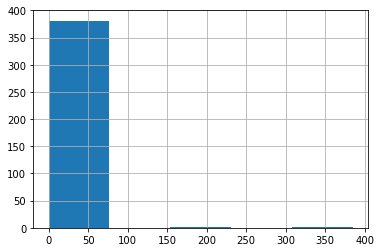

In [190]:
numeric('absences')

Due to low number of absences in the dataset any value > 20 is considered as an outlier according to the formula, however we should not get rid of them as for us it could be a valuable indicator. Only values 212 and 385 look suspitious so we can drop them.

Also let's replace 3% of missing values with the most frequent value (0).

In [191]:
students = students[~students['absences'].isin((212, 385))]
students['absences'].fillna(0, inplace=True)

### score

=====STATISTICS=====
count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
Interquartile range is 30.0; non-outlier are from -5.0 to 115.0

======OUTLIERS======
0 outlier(s):
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health, absences, score]
Index: []

[0 rows x 29 columns]

========NANs========
NaNs in the column: 6.0; 2% from total
The most frequent value is 50.0; 14% of total non-null

=====HISTOGRAM======


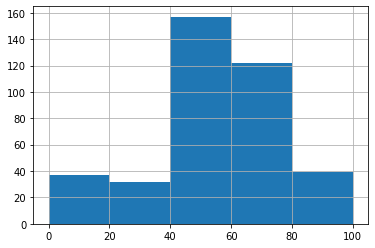

In [192]:
numeric('score')

Score is the value that we want to predict. If score is missing we can't use the data to train our model, so we have to drop all the lines of the dataframe with missing score.

In [193]:
students.dropna(subset=['score'], inplace=True)

Let's once again review our dataframe in order to confirm that it has no missing values and the data types are correct.

In [194]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      387 non-null    object  
 1   sex         387 non-null    object  
 2   age         387 non-null    int64   
 3   address     387 non-null    object  
 4   famsize     387 non-null    object  
 5   Pstatus     387 non-null    object  
 6   Medu        387 non-null    category
 7   Fedu        387 non-null    category
 8   Mjob        387 non-null    object  
 9   Fjob        387 non-null    object  
 10  reason      387 non-null    object  
 11  guardian    387 non-null    object  
 12  traveltime  387 non-null    category
 13  studytime   387 non-null    category
 14  failures    387 non-null    float64 
 15  schoolsup   387 non-null    object  
 16  famsup      387 non-null    object  
 17  paid        387 non-null    object  
 18  activities  387 non-null    object  
 19  nursery 

## Correlation analysis of numeric parameters

In [195]:
students_numeric = students[['age', 'failures', 'absences', 'score']]

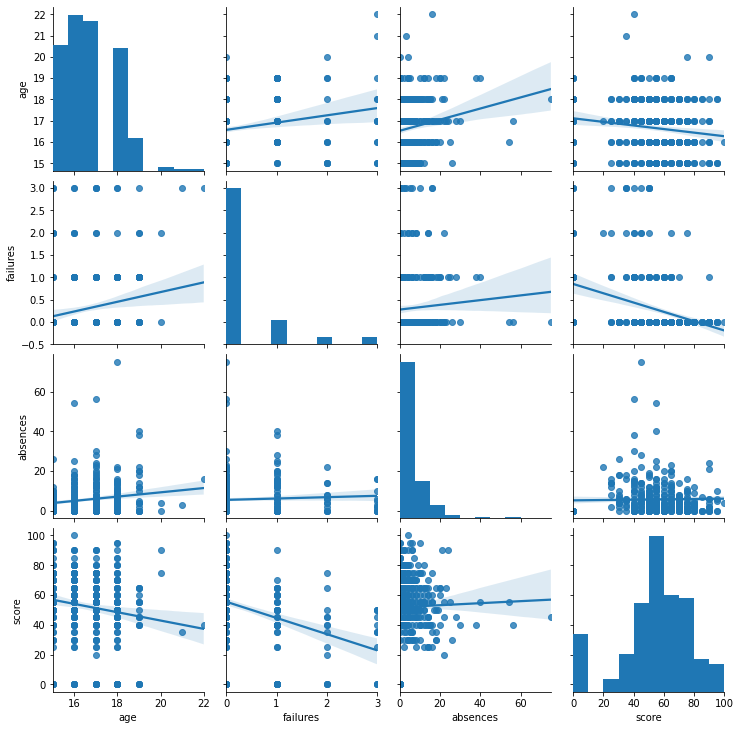

In [196]:
sns.pairplot(students_numeric, kind = 'reg')

In [197]:
students_numeric.corr()

,age,failures,absences,score
age,1.000000,0.192816,0.168017,-0.153488
failures,0.192816,1.000000,0.060343,-0.337138
absences,0.168017,0.060343,1.000000,0.023926
score,-0.153488,-0.337138,0.023926,1.000000


We can't see any significant correlation among parameters, so we'll take all of them to the final dataframe for a model.

## Analysis of categorical parameters and Student's t-test for finding statistical significance

In [198]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

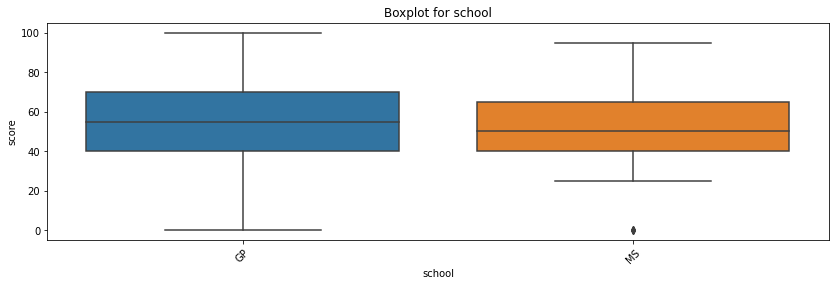

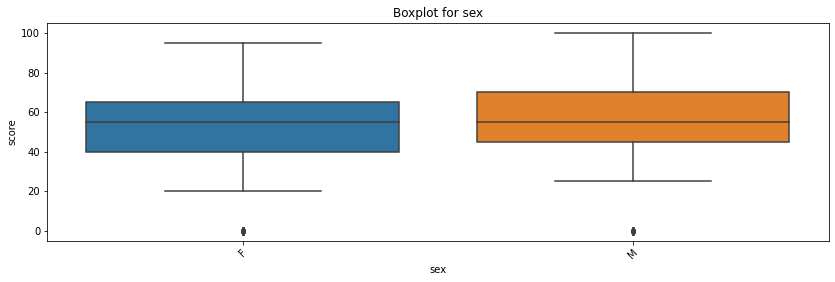

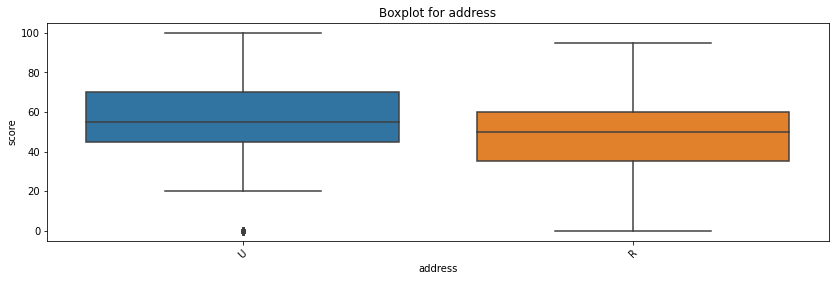

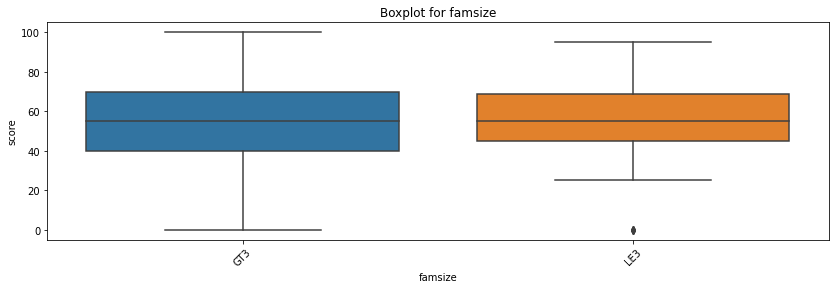

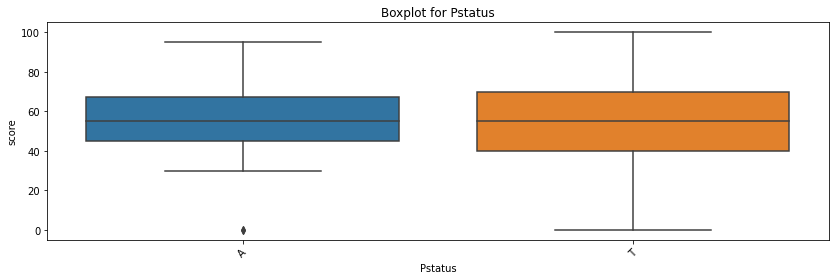

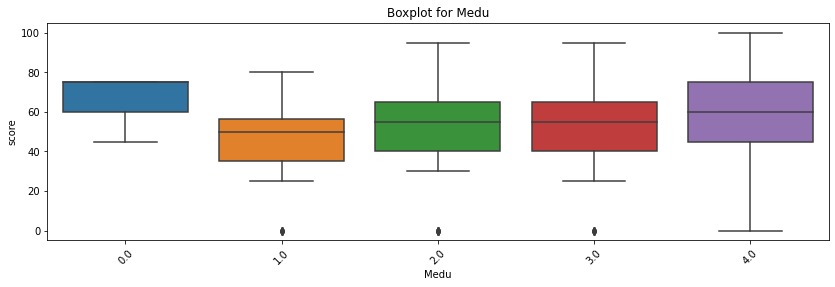

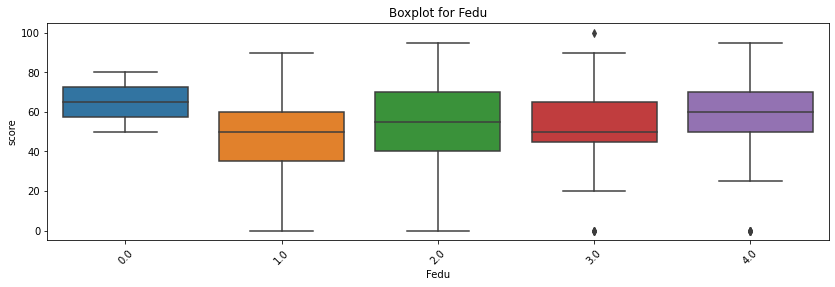

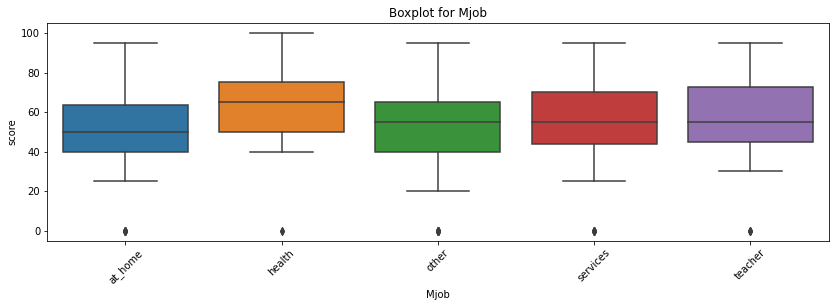

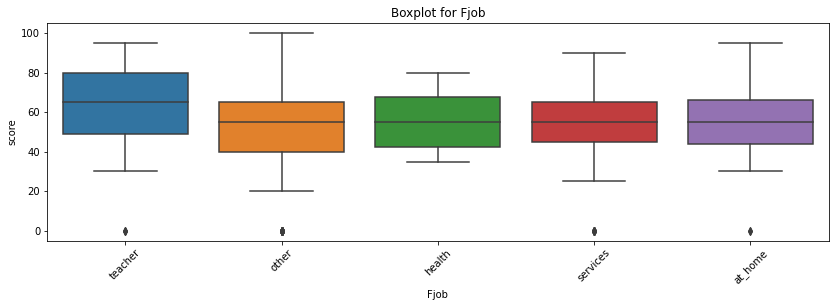

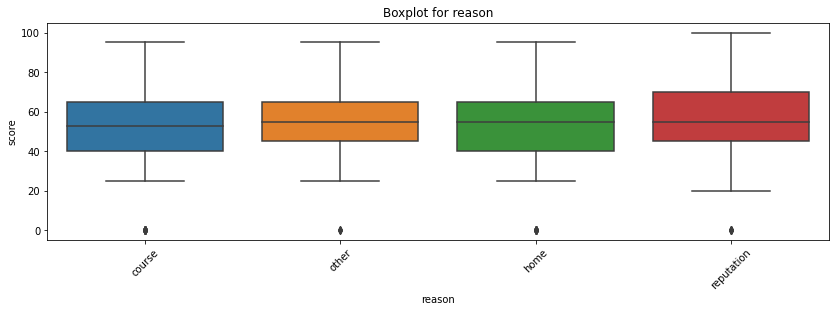

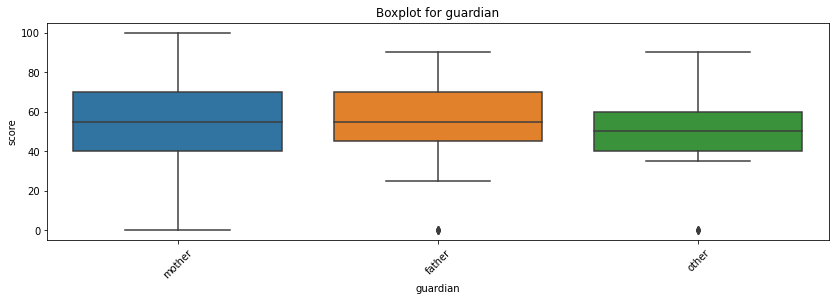

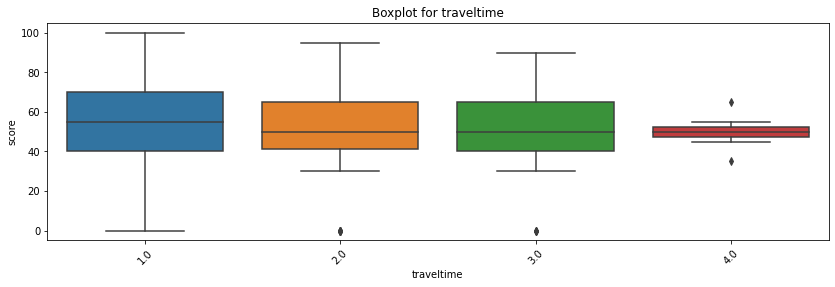

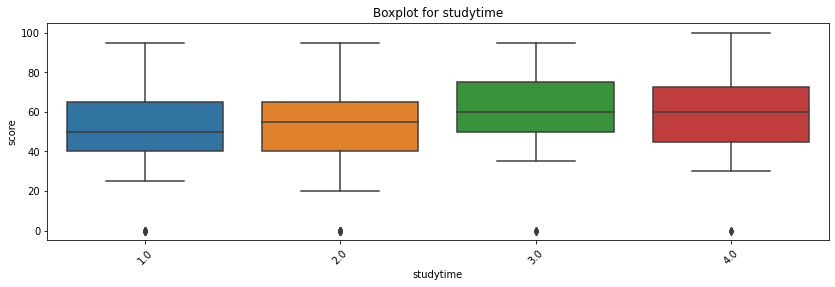

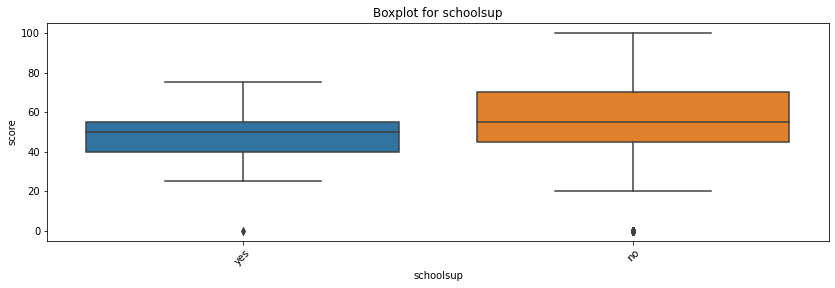

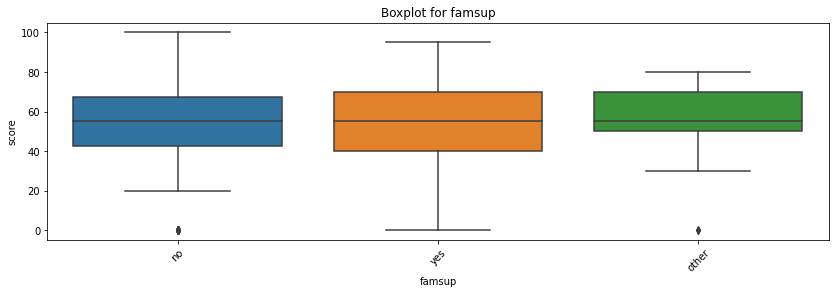

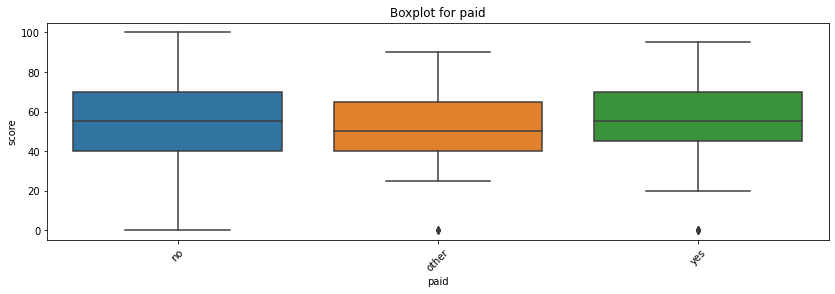

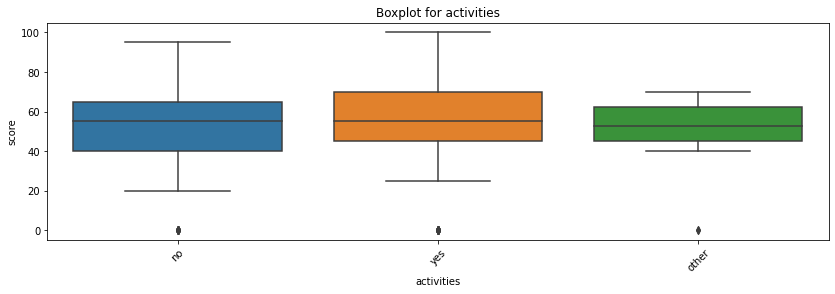

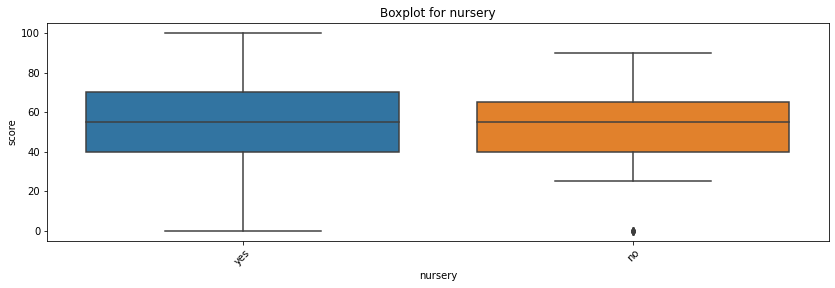

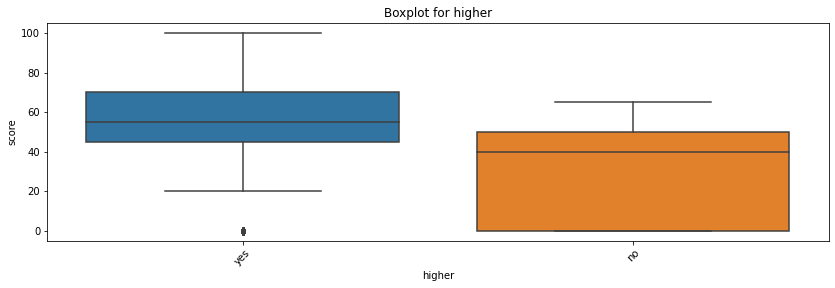

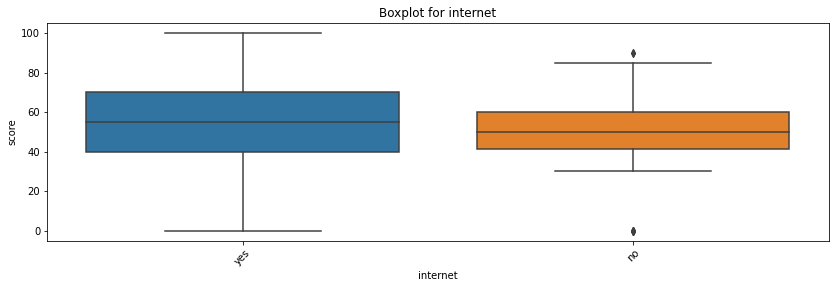

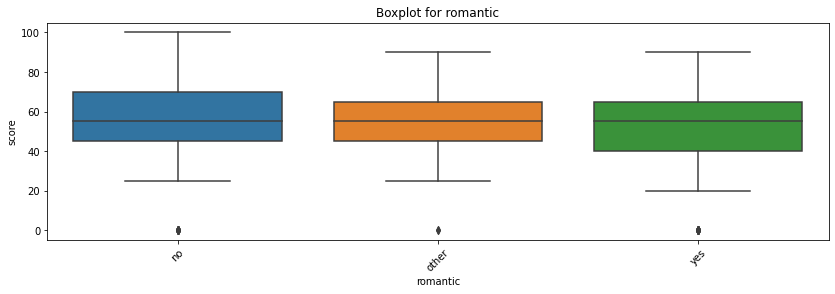

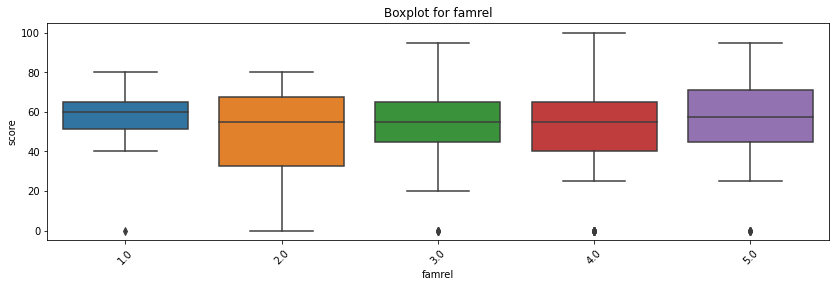

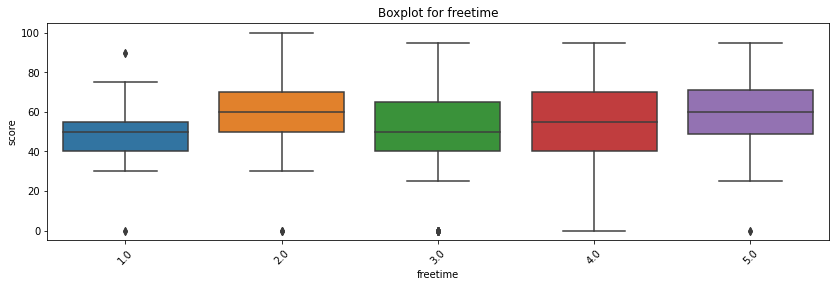

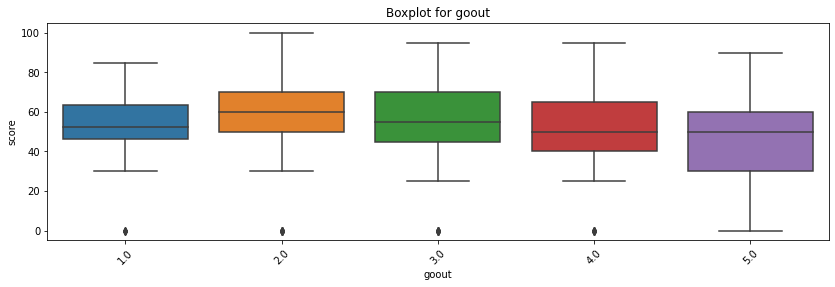

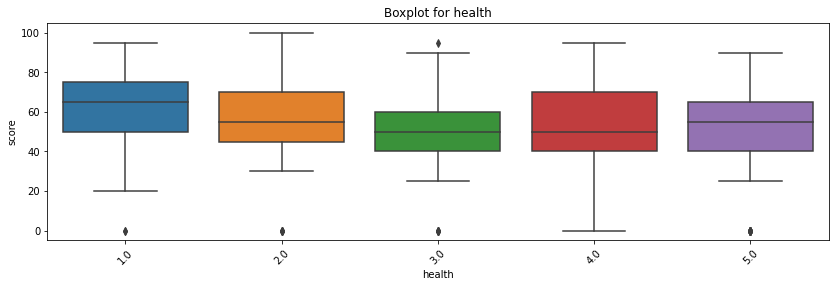

In [199]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [200]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
        <= 0.05/len(combinations_all): # Account for Bonferroni correction
            print('Found statistically significant differences for the column', column)
            break

In [201]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Found statistically significant differences for the column sex
Found statistically significant differences for the column address
Found statistically significant differences for the column Medu
Found statistically significant differences for the column Mjob
Found statistically significant differences for the column higher
Found statistically significant differences for the column romantic


In [202]:
students_for_model = students.loc[:, ['sex', 'age', 'address', 'Medu', 'Mjob', 'failures',
                                      'higher', 'romantic', 'absences', 'score']]
students_for_model.head()

,sex,age,address,Medu,Mjob,failures,higher,romantic,absences,score
0,F,18,U,4.0,at_home,0.0,yes,no,6.0,30.0
1,F,17,U,1.0,at_home,0.0,yes,no,4.0,30.0
2,F,15,U,1.0,at_home,3.0,yes,other,10.0,50.0
3,F,15,U,4.0,health,0.0,yes,yes,2.0,75.0
4,F,16,U,3.0,other,0.0,yes,no,4.0,50.0
